In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import requests

In [2]:
airbnb_data = pd.read_csv('AB_NYC_2019.csv')
airbnb_df = pd.DataFrame(airbnb_data)
airbnb_df.head()

airbnb_df['min_price_to_stay'] = airbnb_df['price'] * airbnb_df['minimum_nights']

airbnb_df = airbnb_df[['host_id', 'id', 'neighbourhood_group','neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'min_price_to_stay',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']]

manhattan_airbnb_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Manhattan']
manhattan_airbnb_df


,host_id,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2845,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,225,45,0.38,2,355
2,4632,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,450,0,NaN,1,365
4,7192,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,800,9,0.10,1,0
5,7322,5099,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,600,74,0.59,1,129
7,8967,5178,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,158,430,3.47,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48886,274311461,36483010,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,1200,0,NaN,1,176
48888,274321313,36484087,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,500,0,NaN,1,31
48892,23492952,36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,1150,0,NaN,1,27
48893,30985759,36485609,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,55,0,NaN,6,2


In [3]:
manhattan_airbnb_df.head()

,host_id,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2845,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,225,45,0.38,2,355
2,4632,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,450,0,NaN,1,365
4,7192,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,800,9,0.10,1,0
5,7322,5099,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,600,74,0.59,1,129
7,8967,5178,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,158,430,3.47,1,220


last_review and reviews_per_month are missing values compared to the rest of the data
likely due to listings have zero reviews...

In [4]:
manhattan_airbnb_df.count()

host_id                           21661
id                                21661
neighbourhood_group               21661
neighbourhood                     21661
latitude                          21661
longitude                         21661
room_type                         21661
price                             21661
minimum_nights                    21661
min_price_to_stay                 21661
number_of_reviews                 21661
reviews_per_month                 16632
calculated_host_listings_count    21661
availability_365                  21661
dtype: int64

In [6]:
manhattan_airbnb_df.loc[:, 'reviews_per_month'] = manhattan_airbnb_df.loc[:, 'reviews_per_month'].fillna(0)
manhattan_airbnb_df.head()

,host_id,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2845,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,225,45,0.38,2,355
2,4632,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,450,0,0.00,1,365
4,7192,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,800,9,0.10,1,0
5,7322,5099,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,600,74,0.59,1,129
7,8967,5178,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,158,430,3.47,1,220


In [7]:
min_nights_manhattan_quartiles = manhattan_airbnb_df['minimum_nights'].quantile([.25,.5,.75])
min_nights_lowerq = min_nights_manhattan_quartiles[.25]
min_nights_upperq = min_nights_manhattan_quartiles[.75]
min_nights_iqr = (min_nights_upperq-min_nights_lowerq).round(2)
min_nights_low_b = (min_nights_lowerq - (1.5*min_nights_iqr)).round(2)
print(f'lower bound for minimum nights is {min_nights_low_b}')
min_nights_up_b = (min_nights_upperq + (1.5*min_nights_iqr)).round(2)
print(f'upper bound for minimum nights is {min_nights_up_b}')

price_manhattan_quartiles = manhattan_airbnb_df['price'].quantile([.25,.5,.75])
price_lowerq = price_manhattan_quartiles[.25]
price_upperq = price_manhattan_quartiles[.75]
price_iqr = (price_upperq-price_lowerq).round(2)
price_low_b = (price_lowerq - (1.5*price_iqr)).round(2)
print(f'lower bound for price is {price_low_b}')
price_up_b = (price_upperq + (1.5*price_iqr)).round(2)
print(f'upper bound for price is {price_up_b}')

lower bound for minimum nights is -6.5
upper bound for minimum nights is 13.5
lower bound for price is -92.5
upper bound for price is 407.5


In [8]:
manhattan_airbnb_df = manhattan_airbnb_df.loc[(manhattan_airbnb_df['price'] <= 407.5) & (manhattan_airbnb_df['minimum_nights'] <= 13.5) & (manhattan_airbnb_df['number_of_reviews'] > 0)]
manhattan_airbnb_df

,host_id,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2845,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,225,45,0.38,2,355
4,7192,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,800,9,0.10,1,0
5,7322,5099,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,600,74,0.59,1,129
7,8967,5178,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,158,430,3.47,1,220
8,7490,5203,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,158,118,0.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48576,52917571,36318560,Manhattan,Midtown,40.75286,-73.99297,Private room,120,2,240,1,1.00,1,7
48601,269870940,36335990,Manhattan,Financial District,40.70603,-74.01084,Entire home/apt,75,1,75,1,1.00,1,181
48634,273361532,36351128,Manhattan,Upper West Side,40.80281,-73.96550,Entire home/apt,110,3,330,2,2.00,1,15
48732,33917435,36411407,Manhattan,Lower East Side,40.71825,-73.99019,Entire home/apt,150,4,600,1,1.00,1,13


In [9]:
price_bins = [0,49.9,99.9,149.9,249.9,399.9,10001]
price_bin_names = ['0-49','50-99','100-149','150-249','250-399','>400']

manhattan_airbnb_df['price range'] = pd.cut(manhattan_airbnb_df['price'],price_bins,labels=price_bin_names)

# Getting rid of 3 elements; 1. Properties with overnight accomodation prices >1000
# 2. Properties with overnight stays > 30
# 3. Properties with 0 reviews
# manhattan_airbnb_df_1000 = manhattan_airbnb_df.loc[manhattan_airbnb_df['price'] <= 1000]
# manhattan_airbnb_df_1000 = manhattan_airbnb_df_1000.loc[manhattan_airbnb_df_1000['minimum_nights'] <= 30]
# manhattan_airbnb_df_1000 = manhattan_airbnb_df_1000.loc[manhattan_airbnb_df_1000['number_of_reviews'] > 0]

neighbourhood_by_count = manhattan_airbnb_df[['neighbourhood', 'room_type', 'price range','number_of_reviews','minimum_nights','min_price_to_stay']].groupby(['neighbourhood', 'room_type', 'price range']).agg(['count', 'mean', 'min', 'max'])
neighbourhood_by_count = neighbourhood_by_count.sort_values(by=('number_of_reviews', 'count'), ascending=False)

neighbourhood_by_count.head(25)

C:\Users\ulast\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


number_of_reviews             \
                                                           count       mean   
neighbourhood      room_type       price range                                
Harlem             Private room    50-99                     842  38.019002   
East Village       Entire home/apt 150-249                   413  29.736077   
Upper East Side    Entire home/apt 150-249                   340  26.770588   
Hell's Kitchen     Entire home/apt 150-249                   339  30.185841   
Upper West Side    Entire home/apt 150-249                   329  23.465046   
East Harlem        Private room    50-99                     322  48.304348   
Washington Heights Private room    50-99                     300  32.143333   
Harlem             Entire home/apt 100-149                   280  38.771429   
Upper West Side    Private room    50-99                     260  32.880769   
Harlem             Entire home/apt 150-249                   259  40.544402   
East Village       Private room    50-99                     258  35.755814   
Upper East Side    Entire home/apt 100-149                   247  21.902834   
Chelsea            Entire home/apt 150-249                   247  28.963563   
West Village       Entire home/apt 150-249                   238  26.550420   
Hell's Kitchen     Private room    100-149                   211  54.047393   
Midtown            Entire home/apt 150-249                   207  24.990338   
East Village       Entire home/apt 100-149                   202  26.801980   
Financial District Entire home/apt 150-249                   197  11.857868   
Hell's Kitchen     Entire home/apt 250-399                   188  28.228723   
Lower East Side    Entire home/apt 150-249                   187  37.406417   
Hell's Kitchen     Private room    50-99                     183  49.666667   
East Village       Private room    100-149                   177  32.564972   
Upper East Side    Private room    50-99                     174  34.275862   
Lower East Side    Private room    50-99                     170  37.852941   
East Village       Entire home/apt 250-399                   168  29.101190   

                                                           minimum_nights  \
                                                min    max          count   
neighbourhood      room_type       price range                              
Harlem             Private room    50-99        1.0  458.0            842   
East Village       Entire home/apt 150-249      1.0  403.0            413   
Upper East Side    Entire home/apt 150-249      1.0  314.0            340   
Hell's Kitchen     Entire home/apt 150-249      1.0  276.0            339   
Upper West Side    Entire home/apt 150-249      1.0  401.0            329   
East Harlem        Private room    50-99        1.0  325.0            322   
Washington Heights Private room    50-99        1.0  307.0            300   
Harlem             Entire home/apt 100-149      1.0  322.0            280   
Upper West Side    Private room    50-99        1.0  353.0            260   
Harlem             Entire home/apt 150-249      1.0  287.0            259   
East Village       Private room    50-99        1.0  451.0            258   
Upper East Side    Entire home/apt 100-149      1.0  226.0            247   
Chelsea            Entire home/apt 150-249      1.0  252.0            247   
West Village       Entire home/apt 150-249      1.0  272.0            238   
Hell's Kitchen     Private room    100-149      1.0  394.0            211   
Midtown            Entire home/apt 150-249      1.0  202.0            207   
East Village       Entire home/apt 100-149      1.0  388.0            202   
Financial District Entire home/apt 150-249      1.0  152.0            197   
Hell's Kitchen     Entire home/apt 250-399      1.0  287.0            188   
Lower East Side    Entire home/apt 150-249      1.0  286.0            187   
Hell's Kitchen     Private room    50-99        1.0  430.0     

In [10]:
manhattan_neighbourhood_by_popularity = []

for row in neighbourhood_by_count.head(25).index:
    if row[0] not in manhattan_neighbourhood_by_popularity:
        manhattan_neighbourhood_by_popularity.append(row[0])

manhattan_neighbourhood_listing_count = []


for n in manhattan_neighbourhood_by_popularity:
    count = len(manhattan_airbnb_df.loc[manhattan_airbnb_df['neighbourhood'] == n])
    manhattan_neighbourhood_listing_count.append(count)

listing_count_by_neighbourhood_df = pd.DataFrame({
    'neighbourhood': manhattan_neighbourhood_by_popularity,
    'count': manhattan_neighbourhood_listing_count
})

listing_count_by_neighbourhood_df = listing_count_by_neighbourhood_df.sort_values(by='count', ascending=False)
listing_count_by_neighbourhood_df

,neighbourhood,count
0,Harlem,1981
1,East Village,1333
3,Hell's Kitchen,1258
4,Upper West Side,1174
2,Upper East Side,1083
5,East Harlem,868
9,Midtown,699
6,Washington Heights,663
7,Chelsea,661
11,Lower East Side,646


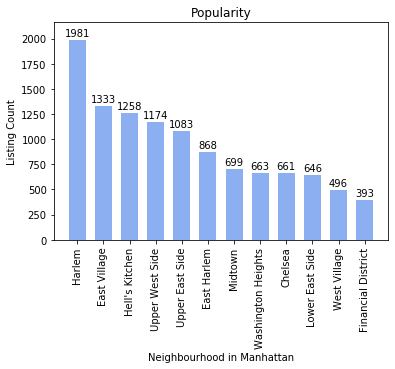

In [11]:
fig, ax = plt.subplots()

x_axis = np.arange(len(manhattan_neighbourhood_by_popularity))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, listing_count_by_neighbourhood_df['neighbourhood'], rotation=90)

y_axis = listing_count_by_neighbourhood_df['count']


rects1 = ax.bar(x_axis, y_axis, color="cornflowerblue", alpha=0.75, align="center",  width=0.65)

ax.set_ylabel('Listing Count')
ax.set_title('Popularity')
ax.set_xlabel('Neighbourhood in Manhattan')
ax.set_ylim(0,max(manhattan_neighbourhood_listing_count)+180)


def autolabel(rects):
    # Attach a text label above each bar in *rects*, displaying its height.
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

plt.show()

In [12]:
neighbourhood_by_price = neighbourhood_by_count.head(25)

neighbourhood_by_price.loc[:, 'worth_per_stay'] = neighbourhood_by_price.loc[:, ('min_price_to_stay', 'mean')] 

neighbourhood_by_price.loc[:, 'Room Type'] = ''

for i in range(len(neighbourhood_by_price)):
    neighbourhood_by_price.iloc[i, 13] = neighbourhood_by_price.index[i][1]

    
for i in range(len(neighbourhood_by_price)):
    if neighbourhood_by_price.iloc[i, 13] == 'Private room':
        neighbourhood_by_price.iloc[i, 12] = neighbourhood_by_price.iloc[i, 9]  * 2
        
neighbourhood_by_price = neighbourhood_by_price.sort_values(by='worth_per_stay', ascending=False)

del neighbourhood_by_price['Room Type']

neighbourhood_by_price



C:\Users\ulast\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2858: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
C:\Users\ulast\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ulast\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


number_of_reviews             \
                                                           count       mean   
neighbourhood      room_type       price range                                
East Village       Entire home/apt 250-399                   168  29.101190   
Hell's Kitchen     Entire home/apt 250-399                   188  28.228723   
West Village       Entire home/apt 150-249                   238  26.550420   
Chelsea            Entire home/apt 150-249                   247  28.963563   
Upper West Side    Entire home/apt 150-249                   329  23.465046   
East Village       Private room    100-149                   177  32.564972   
Hell's Kitchen     Entire home/apt 150-249                   339  30.185841   
East Village       Entire home/apt 150-249                   413  29.736077   
Midtown            Entire home/apt 150-249                   207  24.990338   
Hell's Kitchen     Private room    100-149                   211  54.047393   
Upper East Side    Entire home/apt 150-249                   340  26.770588   
Lower East Side    Entire home/apt 150-249                   187  37.406417   
Harlem             Entire home/apt 150-249                   259  40.544402   
Financial District Entire home/apt 150-249                   197  11.857868   
Hell's Kitchen     Private room    50-99                     183  49.666667   
East Village       Private room    50-99                     258  35.755814   
Lower East Side    Private room    50-99                     170  37.852941   
Upper East Side    Private room    50-99                     174  34.275862   
East Village       Entire home/apt 100-149                   202  26.801980   
Upper West Side    Private room    50-99                     260  32.880769   
Upper East Side    Entire home/apt 100-149                   247  21.902834   
Harlem             Entire home/apt 100-149                   280  38.771429   
East Harlem        Private room    50-99                     322  48.304348   
Harlem             Private room    50-99                     842  38.019002   
Washington Heights Private room    50-99                     300  32.143333   

                                                           minimum_nights  \
                                                min    max          count   
neighbourhood      room_type       price range                              
East Village       Entire home/apt 250-399      1.0  320.0            168   
Hell's Kitchen     Entire home/apt 250-399      1.0  287.0            188   
West Village       Entire home/apt 150-249      1.0  272.0            238   
Chelsea            Entire home/apt 150-249      1.0  252.0            247   
Upper West Side    Entire home/apt 150-249      1.0  401.0            329   
East Village       Private room    100-149      1.0  414.0            177   
Hell's Kitchen     Entire home/apt 150-249      1.0  276.0            339   
East Village       Entire home/apt 150-249      1.0  403.0            413   
Midtown            Entire home/apt 150-249      1.0  202.0            207   
Hell's Kitchen     Private room    100-149      1.0  394.0            211   
Upper East Side    Entire home/apt 150-249      1.0  314.0            340   
Lower East Side    Entire home/apt 150-249      1.0  286.0            187   
Harlem             Entire home/apt 150-249      1.0  287.0            259   
Financial District Entire home/apt 150-249      1.0  152.0            197   
Hell's Kitchen     Private room    50-99        1.0  430.0            183   
East Village       Private room    50-99        1.0  451.0            258   
Lower East Side    Private room    50-99        1.0  540.0            170   
Upper East Side    Private room    50-99        1.0  389.0            174   
East Village       Entire home/apt 100-149      1.0  388.0            202   
Upper West Side    Private room    50-99        1.0  353.0            260   
Upper East Side    Entire home/apt 100-149      1.0  226.0     

In [15]:
manhattan_neighbourhood_by_worth = []



for row in neighbourhood_by_price.index:
    if row[0] not in manhattan_neighbourhood_by_worth:
        manhattan_neighbourhood_by_worth.append(row[0])
        

neighbourhood_by_price.loc[:, 'location'] = ''
for i in range(len(neighbourhood_by_price)):
    neighbourhood_by_price.iloc[i, 13] = neighbourhood_by_price.index[i][0]
    


manhattan_neighbourhood_worth_per_stay = []


for n in manhattan_neighbourhood_by_worth:
    price = sum(neighbourhood_by_price.loc[neighbourhood_by_price['location'] == n, 'worth_per_stay'])
    manhattan_neighbourhood_worth_per_stay.append(price)
    

worth_per_stay_by_neighbourhood_df = pd.DataFrame({
    'neighbourhood': manhattan_neighbourhood_by_worth,
    'Worth per Stay': manhattan_neighbourhood_worth_per_stay
})

worth_per_stay_by_neighbourhood_df = worth_per_stay_by_neighbourhood_df.sort_values(by='Worth per Stay', ascending=False)
worth_per_stay_by_neighbourhood_df



C:\Users\ulast\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2858: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


,neighbourhood,Worth per Stay
0,East Village,2865.364366
1,Hell's Kitchen,2446.161527
6,Upper East Side,1370.758038
8,Harlem,1226.494493
4,Upper West Side,995.458452
7,Lower East Side,966.960428
2,West Village,611.718487
3,Chelsea,599.919028
5,Midtown,553.579710
9,Financial District,496.223350


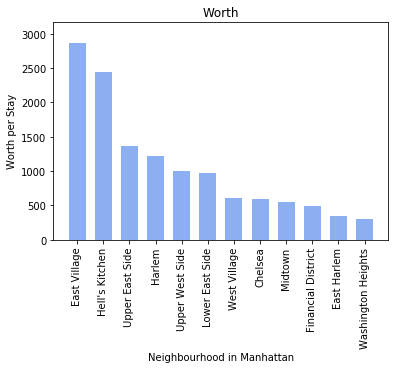

In [16]:
fig, ax = plt.subplots()

x_axis = np.arange(len(manhattan_neighbourhood_by_worth))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, worth_per_stay_by_neighbourhood_df['neighbourhood'], rotation=90)

y_axis = round(worth_per_stay_by_neighbourhood_df['Worth per Stay'], 2)


rects1 = ax.bar(x_axis, y_axis, color="cornflowerblue", alpha=0.75, align="center",  width=0.65)

ax.set_ylabel('Worth per Stay')
ax.set_title('Worth')
ax.set_xlabel('Neighbourhood in Manhattan')
ax.set_ylim(0,max(manhattan_neighbourhood_worth_per_stay)+300)


# def autolabel(rects):
#     # Attach a text label above each bar in *rects*, displaying its height.
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 2),  
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)

plt.show()

Picking top 5 neighbourhoods for profitability calculation:

1. Upper West Side
2. Upper East Side
3. Hell's Kitchen
4. East Village
5. Harlem



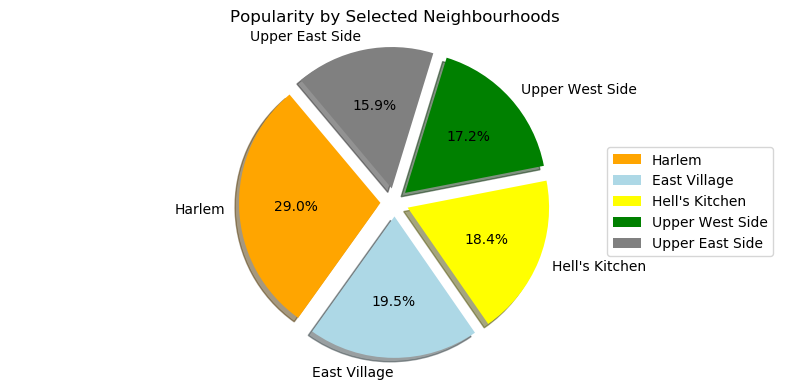

In [36]:
pie_chart_df = listing_count_by_neighbourhood_df.reset_index(drop=True)

pie_chart_df

pie_chart_df = pie_chart_df.loc[0:4, :]

fig, ax = plt.subplots(figsize=(8, 4), subplot_kw=dict(aspect="equal"))

neigh_list = pie_chart_df['neighbourhood']
length = len(pie_chart_df['neighbourhood'])

x_axis = np.arange(length)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, neigh_list, rotation=90)

y_axis = pie_chart_df['count']

explode = (0.1,0.1,0.1,0.1,0.1)
colors = ["orange","lightblue", "yellow", "green", "grey"]

ax.pie(y_axis, explode=explode, labels=neigh_list, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=130)

ax.set_title("Popularity by Selected Neighbourhoods")
ax.legend(loc="center right")

plt.axis("equal")

fig.tight_layout()
plt.show()

In [37]:
profitability_df = worth_per_stay_by_neighbourhood_df.reset_index(drop=True)

profitability_df = profitability_df.iloc[0:5, :]

profitability_df.loc[:, 'Profitability'] = ''

profitability_df

profitability_df.iloc[0, 2] = profitability_df.iloc[0, 1] * (pie_chart_df.iloc[1, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[1, 2] = profitability_df.iloc[1, 1] * (pie_chart_df.iloc[2, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[2, 2] = profitability_df.iloc[2, 1] * (pie_chart_df.iloc[4, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[3, 2] = profitability_df.iloc[3, 1] * (pie_chart_df.iloc[0, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[4, 2] = profitability_df.iloc[4, 1] * (pie_chart_df.iloc[3, 1] / sum(pie_chart_df['count'])) 

profitability_df = profitability_df.loc[:, ['neighbourhood', 'Profitability']]

profitability_df = profitability_df.sort_values(by='Profitability', ascending=False)

profitability_df

,neighbourhood,Profitability
0,East Village,559.31
1,Hell's Kitchen,450.618
3,Harlem,355.789
2,Upper East Side,217.386
4,Upper West Side,171.133


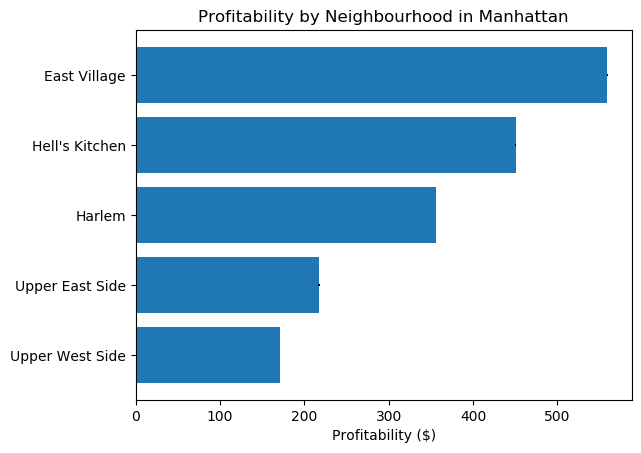

In [38]:
y_axis = profitability_df['neighbourhood'].values
x_axis = profitability_df['Profitability'].values


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data

y_pos = np.arange(len(y_axis))
error = np.random.rand(len(y_axis))

ax.barh(y_pos, x_axis, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_axis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Profitability ($)')
ax.set_title('Profitability by Neighbourhood in Manhattan')

plt.show()

In [39]:
bronx_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Bronx']

manhattan_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Manhattan']

queens_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Queens']

brooklyn_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Brooklyn']

staten_island_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Staten Island']

In [41]:
bronx_sample_crime_df = bronx_crime_df.sample(n=100, replace=True)
manhattan_sample_crime_df = manhattan_crime_df.sample(n=100, replace=True)
queens_sample_crime_df = queens_crime_df.sample(n=100, replace=True)
brooklyn_sample_crime_df = brooklyn_crime_df.sample(n=100, replace=True)
staten_island_sample_crime_df = staten_island_crime_df.sample(n=100, replace=True)


bronx_sample_crime_df = bronx_sample_crime_df.reset_index(drop=True)
manhattan_sample_crime_df = manhattan_sample_crime_df.reset_index(drop=True)
queens_sample_crime_df = queens_sample_crime_df.reset_index(drop=True)
brooklyn_sample_crime_df = brooklyn_sample_crime_df.reset_index(drop=True)
staten_island_sample_crime_df = staten_island_sample_crime_df.reset_index(drop=True)

In [42]:
crime_df_sample_list = [bronx_sample_crime_df, manhattan_sample_crime_df, queens_sample_crime_df, brooklyn_sample_crime_df, staten_island_sample_crime_df]

neighbourhoods = ['Bronx', 'Manhattan', 'Queens', 'Brooklyn', 'Staten Island']
crime_numbers = []

for sample in crime_df_sample_list:
    for index, row in sample.iterrows():
        neighbourhood = row["neighbourhood"]
        neighbourhood_group = row["neighbourhood_group"]
        print(f'Looking for crime rate in index no:{index} | {neighbourhood} | {neighbourhood_group}')
        lat = row["latitude"]
        lng = row["longitude"]
        url = 'https://data.cityofnewyork.us/resource/qb7u-rbmr.json?$where=within_circle'
        query_url = url + f"(lat_lon, {lat}, {lng}, 2000)"
    
        response = requests.get(query_url)
        data = response.json()
    
        try:
            sample.loc[index,'Number of Crimes'] = len(data)

        except:
            print(f"missing value for row number {index}")
    print(f"Total Number of Crimes in {neighbourhood_group}: {sum(sample['Number of Crimes'])}")
    crime_numbers.append(sum(sample['Number of Crimes']))
    
print(f"------------------------------------------------------------------------")
print(f"Data retrieval complete.")

Looking for crime rate in index no:0 | Norwood | Bronx
Looking for crime rate in index no:1 | Fieldston | Bronx
Looking for crime rate in index no:2 | Claremont Village | Bronx
Looking for crime rate in index no:3 | Eastchester | Bronx
Looking for crime rate in index no:4 | Wakefield | Bronx
Looking for crime rate in index no:5 | Concourse | Bronx
Looking for crime rate in index no:6 | Parkchester | Bronx
Looking for crime rate in index no:7 | Port Morris | Bronx
Looking for crime rate in index no:8 | Van Nest | Bronx
Looking for crime rate in index no:9 | Mount Eden | Bronx
Looking for crime rate in index no:10 | Morris Heights | Bronx
Looking for crime rate in index no:11 | Morris Park | Bronx
Looking for crime rate in index no:12 | Throgs Neck | Bronx
Looking for crime rate in index no:13 | Port Morris | Bronx
Looking for crime rate in index no:14 | Williamsbridge | Bronx
Looking for crime rate in index no:15 | Port Morris | Bronx
Looking for crime rate in index no:16 | Parkchester 

Looking for crime rate in index no:35 | East Village | Manhattan
Looking for crime rate in index no:36 | Kips Bay | Manhattan
Looking for crime rate in index no:37 | Greenwich Village | Manhattan
Looking for crime rate in index no:38 | Inwood | Manhattan
Looking for crime rate in index no:39 | West Village | Manhattan
Looking for crime rate in index no:40 | Chelsea | Manhattan
Looking for crime rate in index no:41 | West Village | Manhattan
Looking for crime rate in index no:42 | Chinatown | Manhattan
Looking for crime rate in index no:43 | Upper East Side | Manhattan
Looking for crime rate in index no:44 | Hell's Kitchen | Manhattan
Looking for crime rate in index no:45 | Midtown | Manhattan
Looking for crime rate in index no:46 | East Village | Manhattan
Looking for crime rate in index no:47 | East Harlem | Manhattan
Looking for crime rate in index no:48 | Upper West Side | Manhattan
Looking for crime rate in index no:49 | Upper West Side | Manhattan
Looking for crime rate in index n

Looking for crime rate in index no:65 | Astoria | Queens
Looking for crime rate in index no:66 | Long Island City | Queens
Looking for crime rate in index no:67 | Jamaica | Queens
Looking for crime rate in index no:68 | Sunnyside | Queens
Looking for crime rate in index no:69 | East Elmhurst | Queens
Looking for crime rate in index no:70 | Jamaica | Queens
Looking for crime rate in index no:71 | St. Albans | Queens
Looking for crime rate in index no:72 | Elmhurst | Queens
Looking for crime rate in index no:73 | Astoria | Queens
Looking for crime rate in index no:74 | Flushing | Queens
Looking for crime rate in index no:75 | Long Island City | Queens
Looking for crime rate in index no:76 | Richmond Hill | Queens
Looking for crime rate in index no:77 | Ditmars Steinway | Queens
Looking for crime rate in index no:78 | Astoria | Queens
Looking for crime rate in index no:79 | Flushing | Queens
Looking for crime rate in index no:80 | Rego Park | Queens
Looking for crime rate in index no:81 |

Looking for crime rate in index no:93 | Coney Island | Brooklyn
Looking for crime rate in index no:94 | Downtown Brooklyn | Brooklyn
Looking for crime rate in index no:95 | Bedford-Stuyvesant | Brooklyn
Looking for crime rate in index no:96 | Park Slope | Brooklyn
Looking for crime rate in index no:97 | Prospect Heights | Brooklyn
Looking for crime rate in index no:98 | Bedford-Stuyvesant | Brooklyn
Looking for crime rate in index no:99 | Borough Park | Brooklyn
Total Number of Crimes in Brooklyn: 1.0
Looking for crime rate in index no:0 | Grymes Hill | Staten Island
Looking for crime rate in index no:1 | Stapleton | Staten Island
Looking for crime rate in index no:2 | Arrochar | Staten Island
Looking for crime rate in index no:3 | Tompkinsville | Staten Island
Looking for crime rate in index no:4 | Stapleton | Staten Island
Looking for crime rate in index no:5 | St. George | Staten Island
Looking for crime rate in index no:6 | Oakwood | Staten Island
Looking for crime rate in index no

In [43]:
crime_df = pd.DataFrame({'Neighbourhood': neighbourhoods,
                         'Total Crime Number': crime_numbers
                        })

crime_df = crime_df.sort_values(by='Total Crime Number', ascending=False)
crime_df

,Neighbourhood,Total Crime Number
1,Manhattan,362.0
0,Bronx,14.0
2,Queens,8.0
3,Brooklyn,1.0
4,Staten Island,0.0
